# Plot Results


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
project_root = "/content/drive/My Drive/midas"
if project_root not in sys.path:
    sys.path.append(project_root)

Mounted at /content/drive


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import os
import pandas as pd
from utils.preprocess import load_full_isic
from utils.metrics import print_named_class_distribution, plot_class_distribution
import utils.dataloader

results_root = Path("/content/drive/MyDrive/midas/results")


In [4]:
!pip uninstall -y patsy seaborn
!pip install seaborn

Found existing installation: patsy 1.0.1
Uninstalling patsy-1.0.1:
  Successfully uninstalled patsy-1.0.1
Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.1 MB/s eta 0:00:00


## Class distribution

In [3]:
# full training data paths
data_dir = "/content/drive/My Drive/midas/data"
labels_path = os.path.join(data_dir, "ISIC_2019_Training_GroundTruth.csv")
meta_path = os.path.join(data_dir, "ISIC_2019_Training_Metadata.csv")
train_dir = os.path.join(data_dir, f"ISIC_2019_Training_Input")
test_dir = os.path.join(data_dir, f"ISIC_2019_Test_Input")
# load merged metadata + labels
train_df, index_to_label = load_full_isic(labels_path, meta_path)

Loaded 22480 images from full ISIC data set.


In [4]:
test_labels = "/content/drive/My Drive/midas/data/ISIC_2019_Test_GroundTruth.csv"
test_meta = "/content/drive/My Drive/midas/data/ISIC_2019_Test_Metadata.csv"
test_df, index_to_label = load_full_isic(test_labels, test_meta)

Loaded 7537 images from full ISIC data set.



Train class distribution:
MEL   (0): 0.193
NV    (1): 0.473
BCC   (2): 0.144
AK    (3): 0.038
BKL   (4): 0.104
DF    (5): 0.010
VASC  (6): 0.010
SCC   (7): 0.028

Test class distribution:
MEL   (0): 0.433
NV    (1): 0.285
BCC   (2): 0.120
AK    (3): 0.048
BKL   (4): 0.074
DF    (5): 0.008
VASC  (6): 0.010
SCC   (7): 0.022


/content/drive/My Drive/midas/utils/metrics.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_labels), y=list(sorted_counts), palette="Set2")


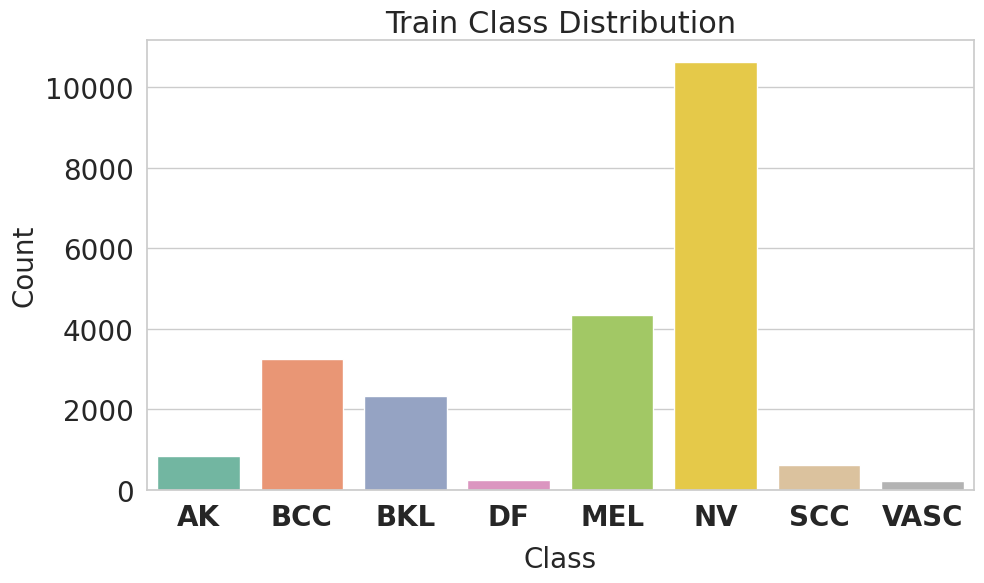

/content/drive/My Drive/midas/utils/metrics.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_labels), y=list(sorted_counts), palette="Set2")


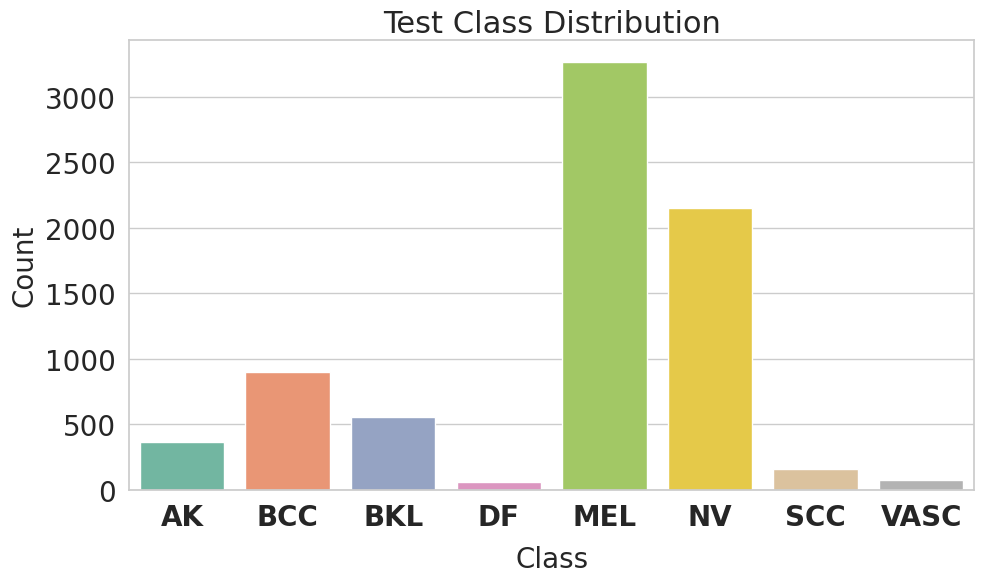

In [5]:
figs_dir = '/content/drive/My Drive/midas/figs'

print_named_class_distribution(train_df, index_to_label, "Train class distribution")
print_named_class_distribution(test_df, index_to_label, "Test class distribution")
plot_class_distribution(train_df, index_to_label, title="Train Class Distribution", save_path=os.path.join(figs_dir, 'train_class_dist.jpeg'))
plot_class_distribution(test_df, index_to_label, title="Test Class Distribution", save_path=os.path.join(figs_dir, 'test_class_dist.jpeg'))


In [9]:
# full training data paths
base_dir_midas = "/content/drive/My Drive/midas/data_midas"
train_dir_midas = os.path.join(base_dir_midas, "MIDAS_GroundTruth_clean.csv")
train_df_midas = pd.read_csv(train_dir_midas)
train_df_midas = train_df_midas.rename(columns={"isic_label": "label"})
img_dir_midas = os.path.join(base_dir_midas)

In [19]:
def plot_midas_class_distribution(df, title="", save_path=None):
    label_counts = df['label'].value_counts()
    sorted_counts = label_counts.sort_index()  # sort alphabetically

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette="Set2")

    plt.title(title, fontsize=22, weight='bold')
    plt.xlabel("Class", fontsize=20, labelpad=10)
    plt.ylabel("Count", fontsize=20, labelpad=5)
    plt.xticks(fontsize=20, weight='bold')
    plt.yticks(fontsize=20)

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()

<ipython-input-19-7a94f64eb952>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette="Set2")


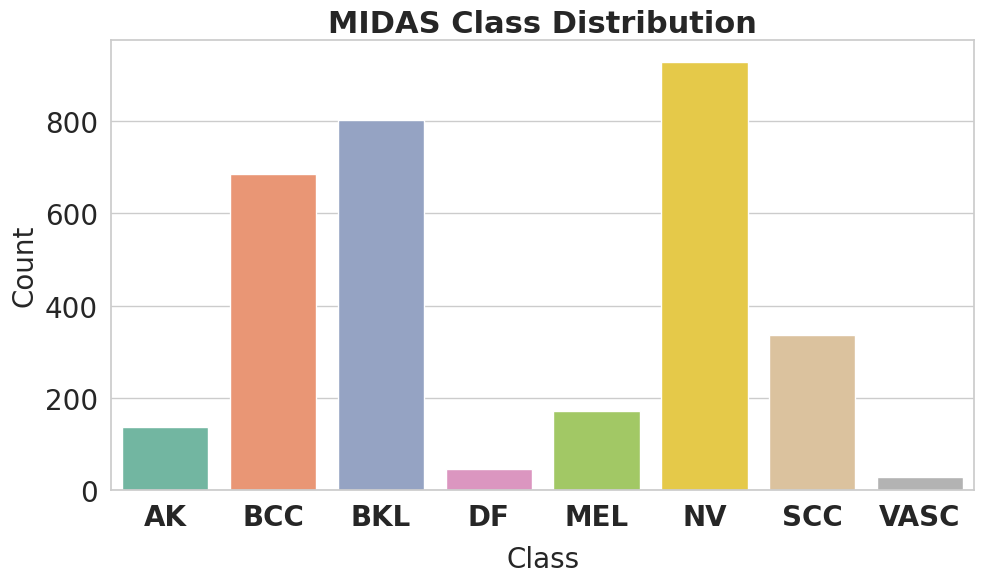

In [20]:
figs_dir = '/content/drive/My Drive/midas/figs'
midas_fig_path = os.path.join(figs_dir, 'midas_class_dist.jpeg')
plot_midas_class_distribution(train_df_midas, title="MIDAS Class Distribution", save_path=midas_fig_path)


## Confusion Matrices

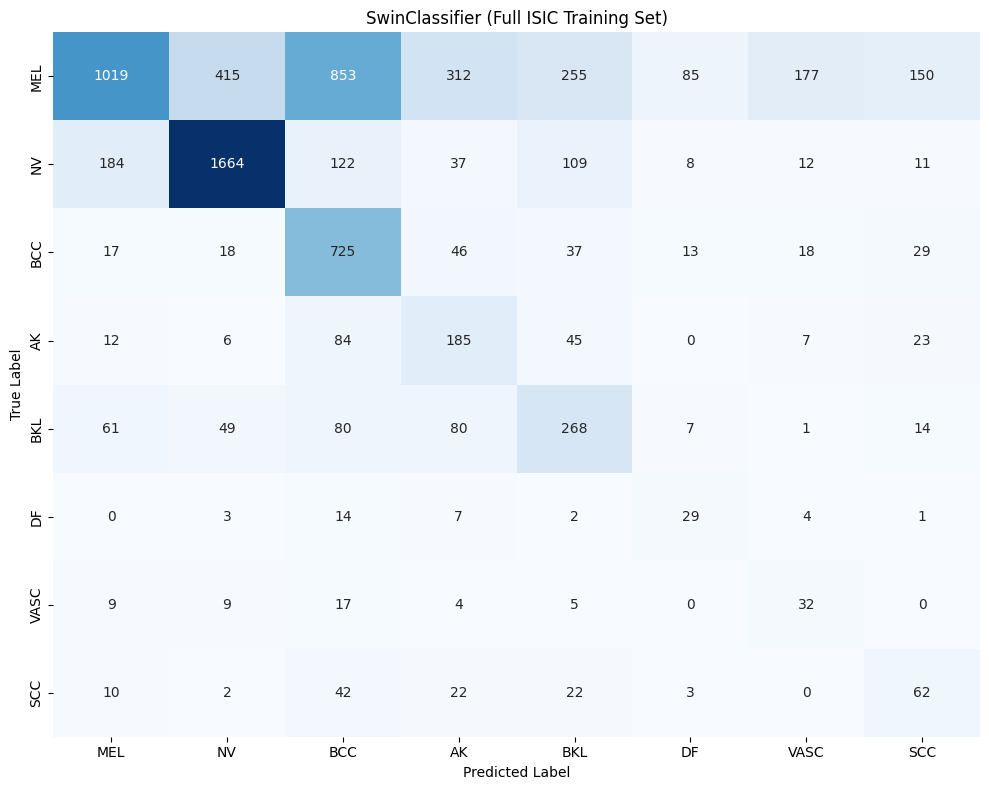

In [ ]:
# final swin

# Define confusion matrix and class labels
conf_matrix_full_isic = np.array([
    [1019, 415, 853, 312, 255, 85, 177, 150],
    [184, 1664, 122, 37, 109, 8, 12, 11],
    [17, 18, 725, 46, 37, 13, 18, 29],
    [12, 6, 84, 185, 45, 0, 7, 23],
    [61, 49, 80, 80, 268, 7, 1, 14],
    [0, 3, 14, 7, 2, 29, 4, 1],
    [9, 9, 17, 4, 5, 0, 32, 0],
    [10, 2, 42, 22, 22, 3, 0, 62]
])

labels = ["MEL", "NV", "BCC", "AK", "BKL", "DF", "VASC", "SCC"]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_full_isic, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SwinClassifier (Full ISIC Training Set)")
plt.tight_layout()
plt.show()

final mlp baseline

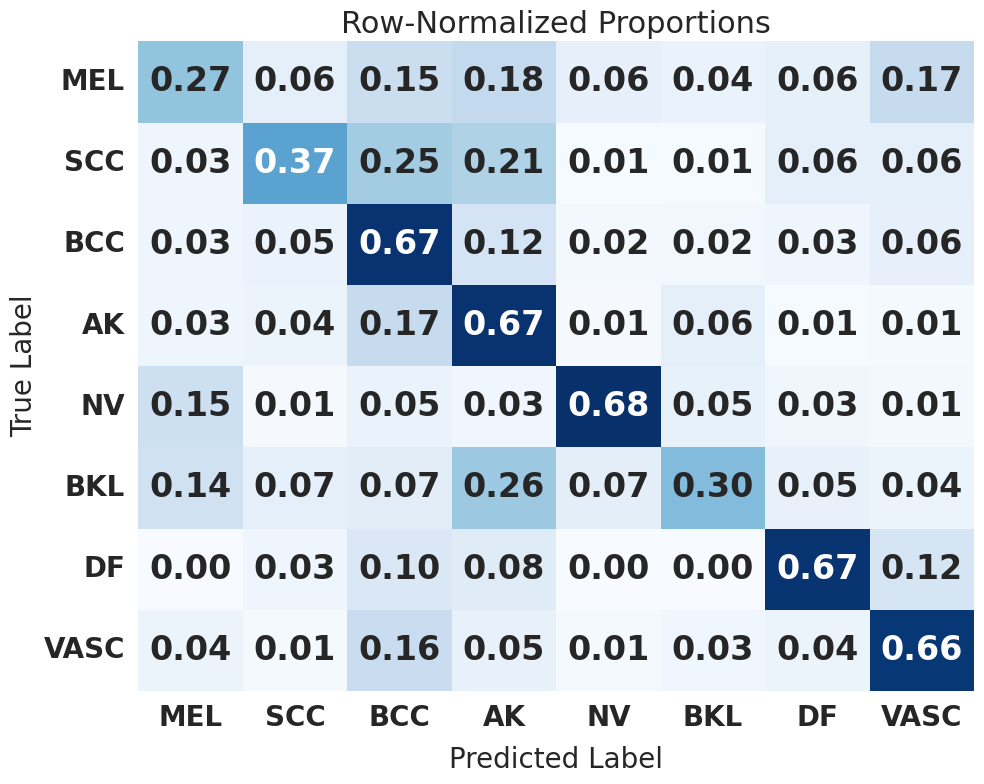

In [28]:

# Define confusion matrix and class labels
conf_matrix = np.array([
    [895, 188, 506, 583, 142, 194, 549, 209],
    [312, 1456, 100, 55, 117, 58, 29, 20],
    [31, 14, 603, 110, 21, 30, 52, 42],
    [12, 3, 61, 242, 23, 2, 4, 15],
    [77, 40, 41, 145, 168, 29, 23, 37],
    [0, 0, 6, 5, 0, 40, 7, 2],
    [3, 1, 12, 4, 2, 3, 50, 1],
    [5, 1, 40, 35, 1, 10, 10, 61]
])

# New class order
ordered_labels = ["MEL", "SCC", "BCC", "AK", "NV", "BKL", "DF", "VASC"]
index_map = [0, 7, 2, 3, 1, 4, 5, 6]  # indices for reordering

# Reorder confusion matrix
conf_matrix = conf_matrix[np.ix_(index_map, index_map)]

# Normalize by row for proportions
conf_matrix_prop = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Plot
plt.figure(figsize=(10, 8))
ax = sns.heatmap(conf_matrix_prop, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=ordered_labels, yticklabels=ordered_labels,
                 cbar=False, annot_kws={"size": 24, "weight": "bold"})

# Axis labels
plt.xlabel("Predicted Label", fontsize=20, labelpad=10)
plt.ylabel("True Label", fontsize=20)
plt.title("Row-Normalized Proportions", fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='y', labelrotation=0)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_weight('bold')

plt.tight_layout()
plt.show()


MIDAS, EffNet
Epoch 19 from logs

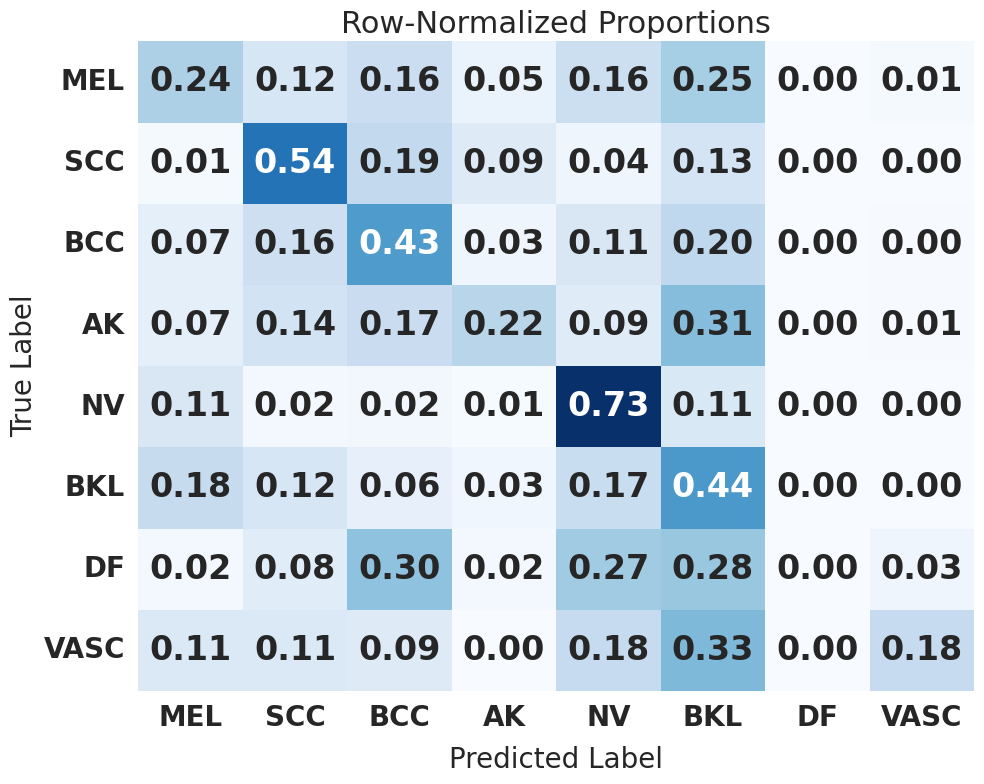

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Original confusion matrix
conf_matrix = np.array([
    [784, 524, 535, 152, 832,   2,  44, 393],
    [244, 1568, 52,  13, 234,   0,   0,  36],
    [62,  103, 384,  29, 179,   0,   4, 142],
    [25,   32,  61,  78, 114,   0,   2,  50],
    [102,  97,  35,  15, 244,   0,   0,  67],
    [1,    16,  18,   1,  17,   0,   2,   5],
    [8,    14,   7,   0,  25,   0,  14,   8],
    [2,     6,  31,  15,  21,   0,   0,  88]
])

# New class order
ordered_labels = ["MEL", "SCC", "BCC", "AK", "NV", "BKL", "DF", "VASC"]
index_map = [0, 7, 2, 3, 1, 4, 5, 6]  # indices for reordering

# Reorder confusion matrix
conf_matrix = conf_matrix[np.ix_(index_map, index_map)]

# Normalize by row for proportions
conf_matrix_prop = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Plot
plt.figure(figsize=(10, 8))
ax = sns.heatmap(conf_matrix_prop, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=ordered_labels, yticklabels=ordered_labels,
                 cbar=False, annot_kws={"size": 24, "weight": "bold"})

# Axis labels
plt.xlabel("Predicted Label", fontsize=20, labelpad=10)
plt.ylabel("True Label", fontsize=20)
plt.title("Row-Normalized Proportions", fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='y', labelrotation=0)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_weight('bold')

plt.tight_layout()
plt.show()


In [31]:
conf_matrix_prop

array([[2.40048990e-01, 1.20330680e-01, 1.63808941e-01, 4.65401102e-02,
        1.60440906e-01, 2.54745867e-01, 6.12369871e-04, 1.34721372e-02],
       [1.22699387e-02, 5.39877301e-01, 1.90184049e-01, 9.20245399e-02,
        3.68098160e-02, 1.28834356e-01, 0.00000000e+00, 0.00000000e+00],
       [6.86600221e-02, 1.57253599e-01, 4.25249169e-01, 3.21151717e-02,
        1.14064230e-01, 1.98228128e-01, 0.00000000e+00, 4.42967885e-03],
       [6.90607735e-02, 1.38121547e-01, 1.68508287e-01, 2.15469613e-01,
        8.83977901e-02, 3.14917127e-01, 0.00000000e+00, 5.52486188e-03],
       [1.13646949e-01, 1.67675827e-02, 2.42198416e-02, 6.05496041e-03,
        7.30321379e-01, 1.08989287e-01, 0.00000000e+00, 0.00000000e+00],
       [1.82142857e-01, 1.19642857e-01, 6.25000000e-02, 2.67857143e-02,
        1.73214286e-01, 4.35714286e-01, 0.00000000e+00, 0.00000000e+00],
       [1.66666667e-02, 8.33333333e-02, 3.00000000e-01, 1.66666667e-02,
        2.66666667e-01, 2.83333333e-01, 0.00000000e+00, 3.

MIDAS, Swin

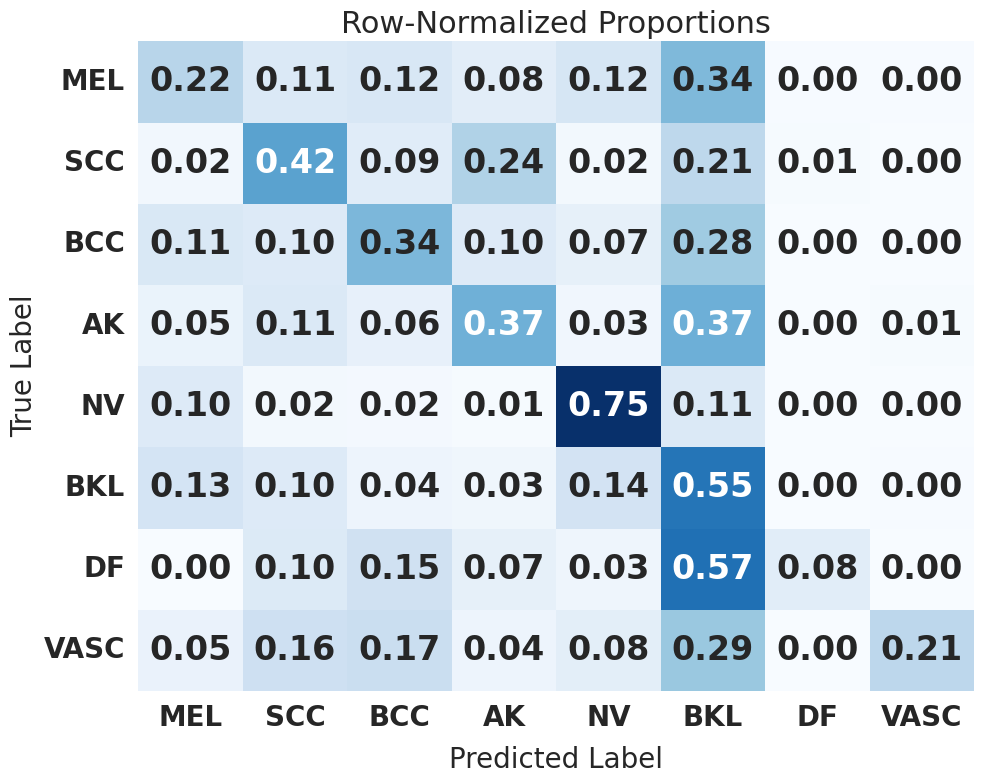

In [32]:
conf_matrix = np.array([
    [722, 406, 389, 263, 1108, 11, 12, 355],
    [211, 1615, 36, 17, 228, 2, 0, 38],
    [101, 60, 311, 88, 252, 1, 0, 90],
    [18, 10, 23, 134, 135, 0, 3, 39],
    [75, 78, 23, 18, 308, 1, 2, 55],
    [0, 2, 9, 4, 34, 5, 0, 6],
    [4, 6, 13, 3, 22, 0, 16, 12],
    [4, 3, 14, 39, 34, 1, 0, 68]
])

# New class order
ordered_labels = ["MEL", "SCC", "BCC", "AK", "NV", "BKL", "DF", "VASC"]
index_map = [0, 7, 2, 3, 1, 4, 5, 6]  # indices for reordering

# Reorder confusion matrix
conf_matrix = conf_matrix[np.ix_(index_map, index_map)]

# Normalize by row for proportions
conf_matrix_prop = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Plot
plt.figure(figsize=(10, 8))
ax = sns.heatmap(conf_matrix_prop, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=ordered_labels, yticklabels=ordered_labels,
                 cbar=False, annot_kws={"size": 24, "weight": "bold"})

# Axis labels
plt.xlabel("Predicted Label", fontsize=20, labelpad=10)
plt.ylabel("True Label", fontsize=20)
plt.title("Row-Normalized Proportions", fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='y', labelrotation=0)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_weight('bold')

plt.tight_layout()
plt.show()

In [33]:
conf_matrix_prop

array([[0.22106552, 0.10869565, 0.11910594, 0.08052664, 0.12431108,
        0.33925291, 0.00336803, 0.00367422],
       [0.02453988, 0.41717791, 0.08588957, 0.2392638 , 0.01840491,
        0.20858896, 0.00613497, 0.        ],
       [0.11184939, 0.09966777, 0.34440753, 0.09745293, 0.06644518,
        0.27906977, 0.00110742, 0.        ],
       [0.04972376, 0.10773481, 0.06353591, 0.37016575, 0.02762431,
        0.37292818, 0.        , 0.00828729],
       [0.09827667, 0.01769912, 0.01676758, 0.00791803, 0.75221239,
        0.10619469, 0.00093153, 0.        ],
       [0.13392857, 0.09821429, 0.04107143, 0.03214286, 0.13928571,
        0.55      , 0.00178571, 0.00357143],
       [0.        , 0.1       , 0.15      , 0.06666667, 0.03333333,
        0.56666667, 0.08333333, 0.        ],
       [0.05263158, 0.15789474, 0.17105263, 0.03947368, 0.07894737,
        0.28947368, 0.        , 0.21052632]])